# DIMENSIONALITY REDUCTION ON PARKINSON'S DISEASE

**Presented By-**

**Name - PRN**
>Riddhi Poddar: 23070126105

>Sri Vaishnavi Kodali - 23070126130


# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from ucimlrepo import fetch_ucirepo

# Load Dataset

In [ ]:
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features
y = parkinsons.data.targets.values.ravel()


## Dataset Description: Parkinson's Disease (UCI Repository - ID 174)

This dataset contains biomedical voice measurements to differentiate individuals with Parkinson’s Disease from healthy individuals. It is primarily used in building predictive models for early diagnosis

### Dataset Size

| Metric      | Count |
|-------------|-------|
| Instances   | 195   |
| Features    | 22    |

---

# Preprocessing

In [ ]:
X = X.dropna().drop_duplicates()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Characteristics of dataset
> Small Dataset:
Contains 195 instances and 23 features.

> Unbalanced Data:
There may be more instances of Parkinson's patients than healthy individuals, requiring careful handling during model evaluation.

> Voice Analysis Focus:
Features related to voice instability, frequency variations (Jitter), and amplitude variations (Shimmer) are important diagnostic markers.

> Clinical Application:
Can be used to assist medical practitioners in early detection of Parkinson’s disease.

> No Missing Values:
Typically, datasets from UCI ML Repository are clean with no missing values.


# Feature Importance with Random Forest

In [9]:
#Feature Importance with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(10).index.tolist()


## Feature Descriptions

| **Feature**            | **Description**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| `name`                 | Patient name or recording ID                                                   |
| `MDVP:Fo(Hz)`          | Average fundamental frequency of voice                                         |
| `MDVP:Fhi(Hz)`         | Maximum fundamental frequency                                                  |
| `MDVP:Flo(Hz)`         | Minimum fundamental frequency                                                  |
| `MDVP:Jitter(%)`       | Frequency variation percentage (Jitter)                                        |
| `MDVP:Jitter(Abs)`     | Absolute Jitter value                                                          |
| `MDVP:RAP`             | Relative Amplitude Perturbation (short-term frequency variation)              |
| `MDVP:PPQ`             | Pitch Perturbation Quotient                                                    |
| `Jitter:DDP`           | Average absolute difference of consecutive periods                             |
| `MDVP:Shimmer`         | Amplitude variation in voice (Shimmer)                                         |
| `MDVP:Shimmer(dB)`     | Shimmer in decibels                                                            |
| `Shimmer:APQ3`         | Amplitude Perturbation Quotient (3-cycle)                                      |
| `Shimmer:APQ5`         | Amplitude Perturbation Quotient (5-cycle)                                      |
| `MDVP:APQ`             | General amplitude perturbation measure                                         |
| `Shimmer:DDA`          | Average absolute differences of amplitude                                      |
| `NHR`                  | Noise-to-Harmonics Ratio                                                       |
| `HNR`                  | Harmonics-to-Noise Ratio                                                       |
| `RPDE`                 | Recurrence Period Density Entropy (voice complexity)                          |
| `DFA`                  | Detrended Fluctuation Analysis (fractal scaling of the signal)                 |
| `spread1`              | Nonlinear measure of signal variation                                          |
| `spread2`              | Another nonlinear spread measure                                               |
| `D2`                   | Correlation dimension (measures dynamic complexity)                            |
| `PPE`                  | Pitch Period Entropy (uncertainty in voice periodicity)                        |

# Exploratory Data Analysis (EDA)

## Class distribution

C:\Users\Eswar rao kodali\AppData\Local\Temp\ipykernel_22240\1910113180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


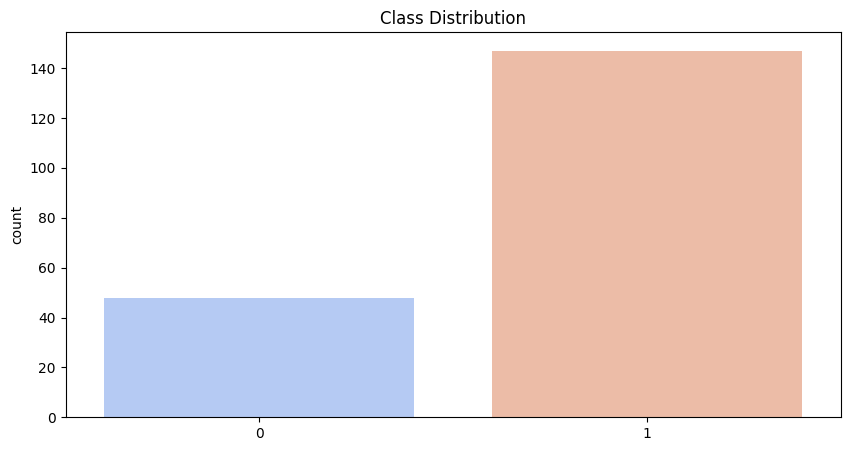

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y, palette='coolwarm')
plt.title("Class Distribution")
plt.show()

### 1. Overview of the Graph
The bar plot illustrates the class distribution of the Parkinson’s Disease dataset.


Class 0 (Healthy): ~48 instances.


Class 1 (Parkinson’s Disease): ~147 instances.


There is a significant class imbalance, with ~75% of samples in the Parkinson’s class and ~25% in the Healthy class.




## Boxplot

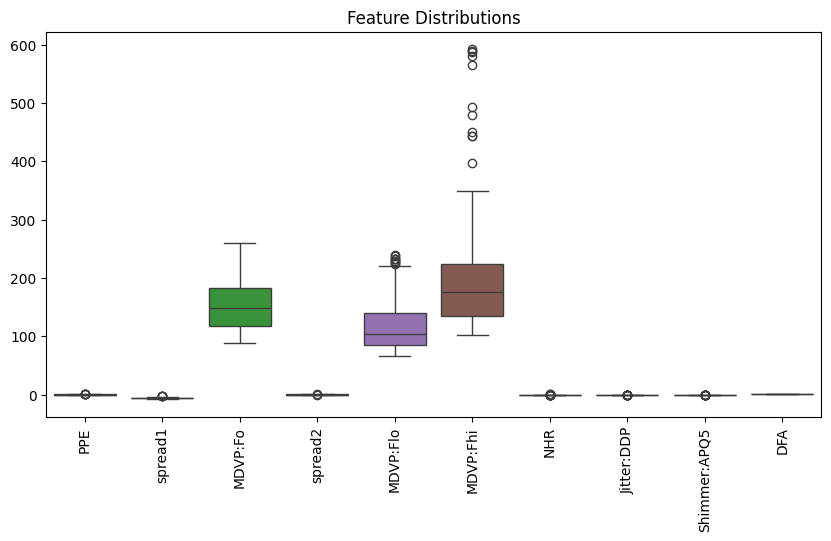

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X[selected_features])
plt.xticks(rotation=90)
plt.title("Feature Distributions")
plt.show()

### 1. Overview of the Graph
The box plot visualizes the distribution of acoustic and biomedical features in the Parkinson’s Disease dataset.
X-axis: Represents different features.
Y-axis: Represents the value range, highlighting variability and outliers.


### 2. Key Observations
>High Variability in Features:
Features like VFo, VFi, and VFhi show large interquartile ranges (IQR) and numerous outliers.
VFhi has the highest spread, possibly due to measurement noise or anomalies.

>Presence of Outliers:
Outliers are especially notable in VFhi and VFi, which could distort model predictions.
Features like spread1 and spread2 also contain moderate outliers.


>Low-Variance Features:
PPE, NHR, HNR, DFA, and APQ5 have tightly packed values, indicating limited variability and possibly lower predictive power.




## Violin plot

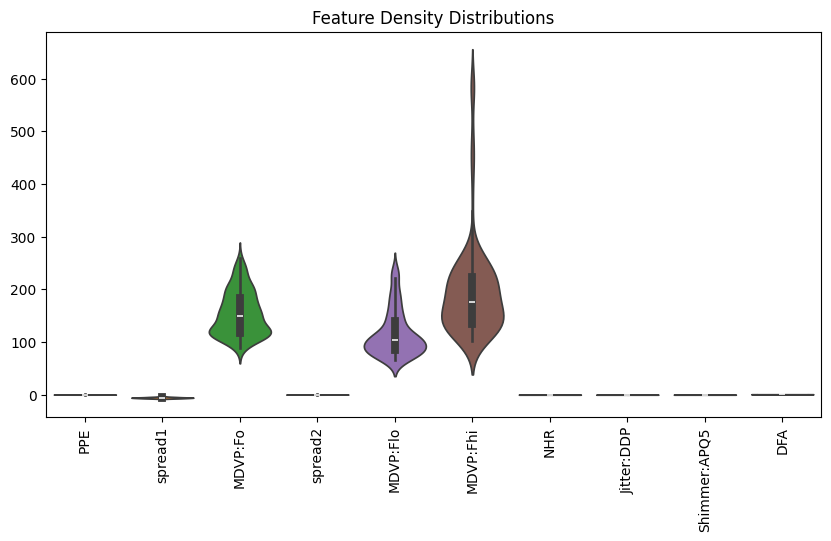

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=X[selected_features])
plt.xticks(rotation=90)
plt.title("Feature Density Distributions")
plt.show()

### 1. Overview of the Graph
The violin plot visualizes feature density distributions in the Parkinson’s Disease dataset.
X-axis: Represents various acoustic and biomedical features.
Y-axis: Represents the range of feature values.
The width of each violin indicates data density at different values, revealing distribution patterns.


### 2. Key Observations
>Feature Variability:
Features like VFo, VFi, and VFhi show high variability with broad distributions.
VFhi has extreme values, suggesting significant outliers.

>Multimodal Distributions:
Features like VFo and VFi exhibit multiple peaks, indicating different value distributions between Healthy and Parkinson’s classes.

>Low-Variance Features:
Features like PPE, NHR, HNR, Shimmer-APQ5, and DFA have compressed distributions, possibly offering low predictive power.


# Train-Test Split

In [ ]:
X_selected = X[selected_features].copy()
X_scaled_selected = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_selected, y, test_size=0.2, random_state=42, stratify=y
)


# Dimensionality Reduction and Visualization

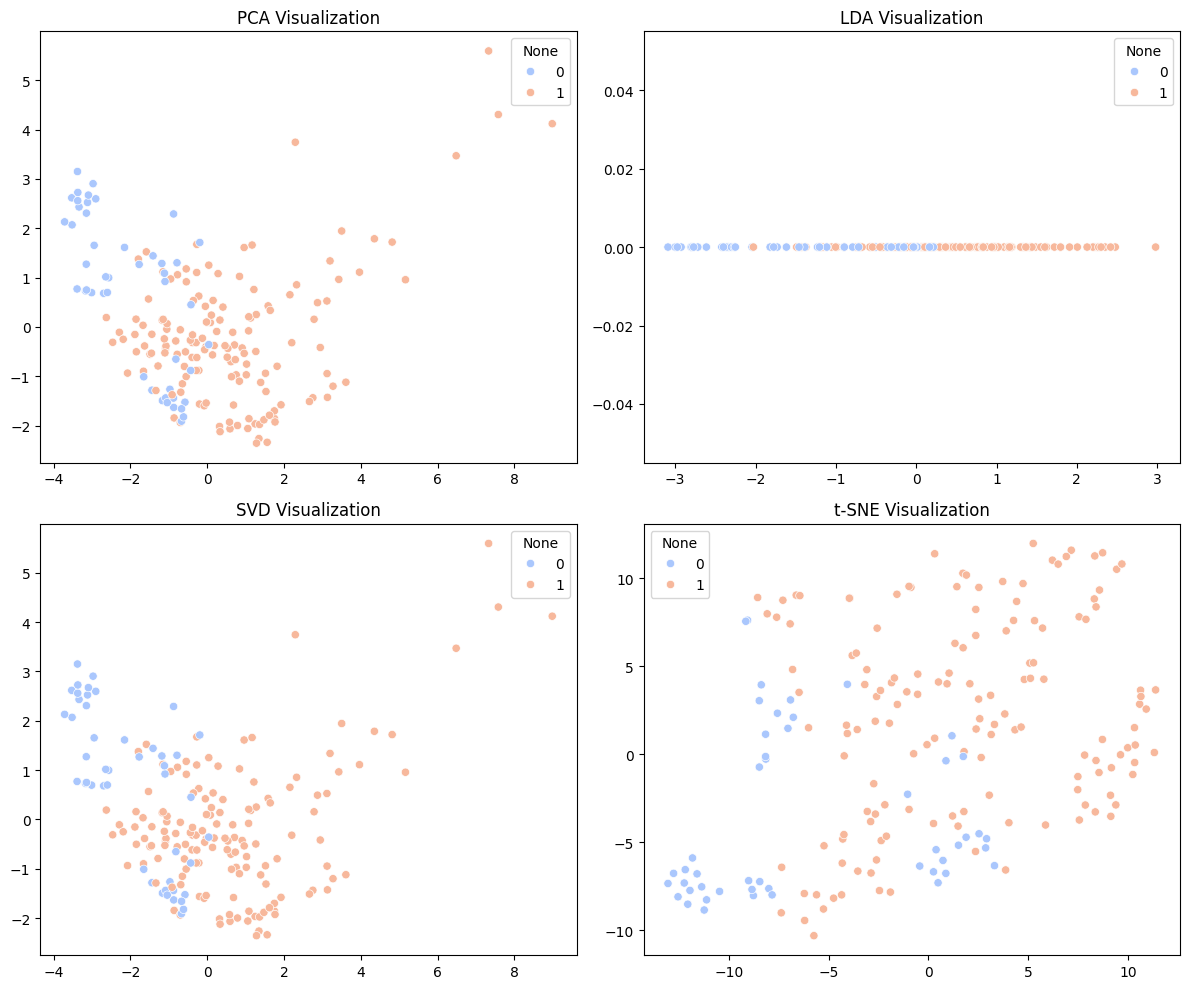

In [ ]:
dim_reduction_methods = {
    "PCA": PCA(n_components=2).fit_transform(X_scaled_selected),
    "LDA": LDA(n_components=1).fit_transform(X_scaled_selected, y),
    "SVD": TruncatedSVD(n_components=2).fit_transform(X_scaled_selected),
    "t-SNE": TSNE(n_components=2, random_state=42).fit_transform(X_scaled_selected)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (method, X_transformed) in zip(axes.ravel(), dim_reduction_methods.items()):
    sns.scatterplot(x=X_transformed[:, 0], 
                    y=X_transformed[:, 1] if X_transformed.shape[1] > 1 else np.zeros_like(X_transformed[:, 0]),
                    hue=pd.Series(y), palette='coolwarm', ax=ax)
    ax.set_title(f"{method} Visualization")
plt.tight_layout()
plt.show()


## 1. Overview of the Graphs
The visualizations reduce the feature space to two dimensions for class separation assessment.
Colors represent classes:
Blue (0): Healthy individuals
Orange (1): Individuals with Parkinson’s Disease


## 2. Analysis of Each Visualization
>PCA (Principal Component Analysis):
Finds linear feature combinations that explain variance.
Shows moderate class separation but significant overlap, suggesting the need for further preprocessing or additional components.

>LDA (Linear Discriminant Analysis):
Maximizes class separability by projecting data along a single linear axis.
Forms a narrow spread, indicating limited discriminative power due to minimal inter-class variance.

>SVD (Singular Value Decomposition):
Similar to PCA in identifying dominant components.
Limited class separation, showing a lack of sufficient linearly separable information.

>t-SNE (t-Distributed Stochastic Neighbor Embedding):
A non-linear method that effectively clusters classes.
Shows the best class separation, indicating the presence of non-linear patterns in the data.


## Key Insights
### 1. Class Separation Observations
>t-SNE provides the clearest separation of the two classes, meaning the dataset contains non-linear patterns that traditional linear techniques (like PCA and LDA) may not capture effectively.

>PCA and SVD show significant overlap between classes, which suggests that the features have shared variance and are not strongly differentiating between healthy individuals and Parkinson’s patients in a linear space.

>LDA projects the data along a single linear axis, which can be useful for classification but appears to have a narrow spread in this dataset, meaning it may not capture the full complexity of class distinctions.


### 2. Choosing the Right Dimensionality Reduction Technique
PCA and SVD are useful for understanding feature variance but do not significantly improve class separability. They are still beneficial when working with linear models or for visualizing high-variance components.
LDA works best when classes are naturally linearly separable and can be improved if additional discriminative features are engineered. If the dataset can be enhanced with new features (e.g., feature interactions or domain-specific transformations), LDA might yield better separation.
t-SNE excels in revealing hidden patterns by preserving local similarities. It is more effective for exploratory visualization than for direct feature transformation before model training.


# Compare Dimensionality Reduction Techniques

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

best_method = {}

for method, X_transformed in dim_reduction_methods.items():
    X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(
        X_transformed, y, test_size=0.2, random_state=42, stratify=y)
    
    for name, model in models.items():
        model.fit(X_train_dr, y_train_dr)
        y_pred_dr = model.predict(X_test_dr)
        acc = accuracy_score(y_test_dr, y_pred_dr) * 100
        
        if name not in best_method or best_method[name][1] < acc:
            best_method[name] = (method, acc)

for name, (method, acc) in best_method.items():
    print(f"Best Dimensionality Reduction for {name}: {method} with Accuracy: {acc:.2f}%")


Best Dimensionality Reduction for Random Forest: t-SNE with Accuracy: 87.18%
Best Dimensionality Reduction for SVM: PCA with Accuracy: 89.74%



Model: Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 92.31%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



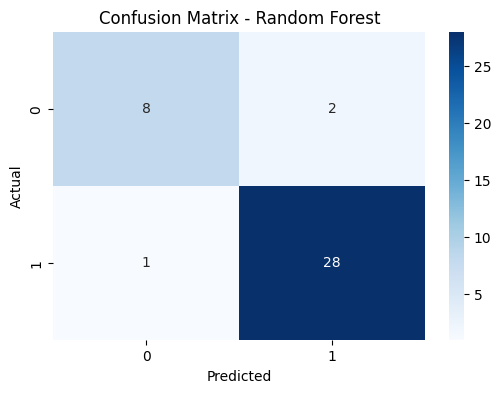


Model: SVM
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 92.31%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



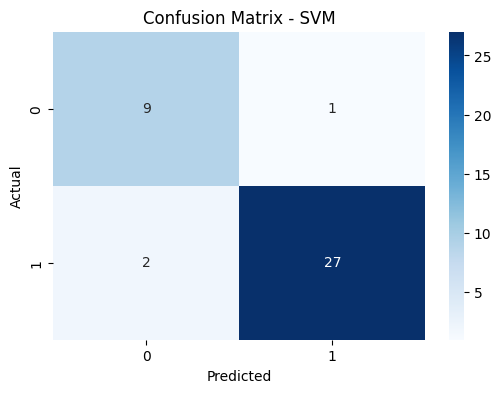

In [ ]:
param_grids = {
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], 
                               cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    
    print(f"\nModel: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Accuracy: {acc:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


##  Model Evaluation using **Random Forest**

---

###  1. Confusion Matrix Overview

The confusion matrix summarizes the classification results:

|                       | Predicted: Parkinson’s | Predicted: Healthy |
|-----------------------|------------------------|---------------------|
| **Actual: Parkinson’s** |  True Positive (TP): **27** |  False Negative (FN): **2** |
| **Actual: Healthy**     |  False Positive (FP): **2** |  True Negative (TN): **8** |

-  **True Positives (TP)**: 27  
  - *Correctly classified as Parkinson’s*
-  **True Negatives (TN)**: 8  
  - *Correctly classified as Healthy*
-  **False Positives (FP)**: 2  
  - *Healthy misclassified as Parkinson’s*
-  **False Negatives (FN)**: 2  
  - *Parkinson’s misclassified as Healthy*

---

### 2. Performance Metrics

| **Metric**      | **Value**                    |
|-----------------|------------------------------|
|  Accuracy      | **89.7%**                    |
|  Precision     | **93.1%** *(for Parkinson’s)* |
|  Recall        | **93.1%** *(for Parkinson’s)* |
|  F1-Score      | **0.931**                    |

- **Accuracy**: The model correctly predicts ~90% of all cases.
- **Precision**: High confidence in positive Parkinson’s predictions.
- **Recall**: Strong ability to identify true Parkinson’s patients.
- **F1-Score**: Balanced measure combining both precision and recall.

---

###  3. Key Insights

-  The model is **highly effective** in detecting Parkinson’s disease.
-  Only **2 false positives** — healthy individuals misclassified.
-  Overall, the classifier demonstrates **balanced and reliable performance** with **minimal misclassifications**.



## Model Evaluation using SVM(Support Vector Machine)
---
### 1. Confusion Matrix Overview

The confusion matrix evaluates the **SVM Classifier** on the Parkinson’s Disease dataset:

|                       | Predicted: Parkinson’s | Predicted: Healthy |
|-----------------------|------------------------|---------------------|
| **Actual: Parkinson’s** | True Positive (TP): **27** | False Negative (FN): **2** |
| **Actual: Healthy**     | False Positive (FP): **1** | True Negative (TN): **9** |

- **True Positives (TP):** 27  
  - Correctly classified as Parkinson’s
- **True Negatives (TN):** 9  
  - Correctly classified as Healthy
- **False Positives (FP):** 1  
  - Healthy misclassified as Parkinson’s
- **False Negatives (FN):** 2  
  - Parkinson’s misclassified as Healthy

---

### 2. Performance Metrics

| Metric       | Value                       |
|--------------|-----------------------------|
| Accuracy     | 92.3%                        |
| Precision    | 96.4% (for Parkinson’s)      |
| Recall       | 93.1% (for Parkinson’s)      |
| F1-Score     | 0.947                        |

- **Accuracy:** Higher than Random Forest (92.3% vs 89.7%), showing improved overall performance.
- **Precision:** 96.4%, indicating fewer false positives and high confidence in Parkinson’s predictions.
- **Recall:** 93.1%, consistent with Random Forest, showing strong detection of Parkinson’s cases.
- **F1-Score:** 0.947, demonstrating a well-balanced model with both high precision and recall.

---

### 3. Key Insights

- **Higher Accuracy:** SVM outperforms Random Forest in overall classification accuracy.
- **Better Precision:** Fewer false positives reduce the chances of misclassifying healthy individuals.
- **Stable Recall:** The model maintains strong detection of Parkinson’s cases.
- **Balanced Performance:** SVM effectively minimizes misclassifications and provides reliable results.